# Introduction to neural network classificaiton with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multillabel classificaiton


## Creating data to view and fit

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
X[:3], y[:3]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203]]), array([1, 1, 1]))

Visualize Data

In [ ]:
import pandas as pd

circles = pd.DataFrame({
    "X0": X[:,0],
    "X1": X[:, 1],
    'label': y
})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


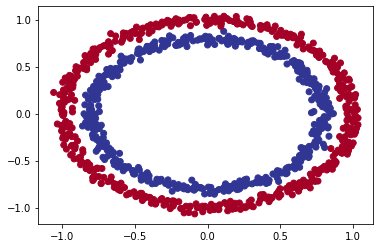

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(
    X[:,0],
    X[:,1],
    c=y,
    cmap=plt.cm.RdYlBu
)


## Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps i modelling with Tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 14ms/step - loss: 4.5802 - accuracy: 0.5040
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 1.5171 - accuracy: 0.4990
Epoch 3/5
32/32 [==============================] - 0s 10ms/step - loss: 0.7336 - accuracy: 0.4980
Epoch 4/5
32/32 [==============================] - 0s 8ms/step - loss: 0.7061 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 0.6979 - accuracy: 0.4920


Trying to improve the model

In [ ]:
# Set the random seed
tf.random.set_seed(42)
# Fitting for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y) # performing as it's guessing

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_2.evaluate(X, y) # performing as it's guessing

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932317614555359, 0.5]

In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving the model

1. Create a model - we might want to add more layer or increase the number of hidden units within a layer
2. Compiling a model - here we might want to choose a different opitmization function
3. Fitting a model - perhaps we might fit our model for more epochs

In [ ]:
X[0].shape

(2,)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, ),
    tf.keras.layers.Dense(10, ),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_3.evaluate(X, y) # performing as it's guessing

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4950


[0.6933007836341858, 0.4950000047683716]

To visualize our models predicitons, let's create a function. This funciton will:
 * Take in a trained mdoel, features and labels
 * Create a meshgrid of the different X values
 * Make predictions across the meshgrid
 * Plt the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on x.
  """
  # Define the axis boudnaries of the plot and create a meshgrid
  X_min, X_max, = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(
      np.linspace(X_min, X_max, 100),
      np.linspace(y_min, y_max, 100),
      )
  # Create X value 
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions 
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Multiclass classification")
    # we have to reshape our predicitons
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
Binary classification


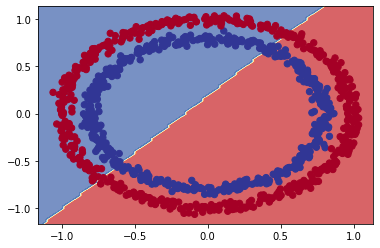

In [ ]:
# Check out the predicitons our model is making
plot_decision_boundary(model_3, X, y)

In [ ]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# Creaet some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = X_regression + 100
X_regression[:3], y_regression[:3]

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 0,  5, 10], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([100, 105, 110], dtype=int32)>)

We compiled our model for a binary classification problem.

But... we're now working on a regression probelm, let's change the model to suit our data

In [ ]:
# Split our regression data into training and test sets (total 200)
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

tf.random.set_seed(42)

# 1. Create the model
model_3_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model for regression
model_3_reg.compile(
    loss = tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model_3_reg.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

2/2 [==============================] - 0s 5ms/step


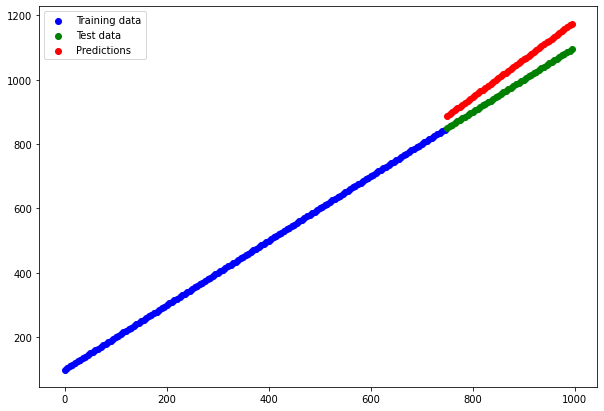

In [ ]:
# Make predicitons with our trained model
y_reg_preds = model_3_reg.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-Linearity

32/32 [==============================] - 0s 3ms/step - loss: 4.3268 - accuracy: 0.4730
[4.326805591583252, 0.4729999899864197]
313/313 [==============================] - 1s 2ms/step
Binary classification


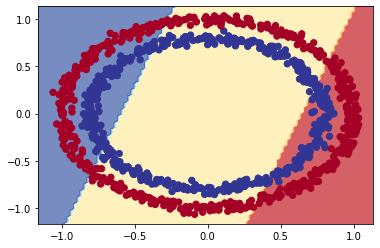

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_4.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
print(model_4.evaluate(X, y))

# 5. Visualizaiton
plot_decision_boundary(model_4, X, y)


Building the model with a non-linear activation function

32/32 [==============================] - 0s 3ms/step - loss: 5.9804 - accuracy: 0.4810
[5.9803690910339355, 0.48100000619888306]
313/313 [==============================] - 1s 2ms/step
Binary classification


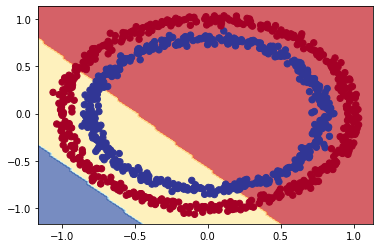

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
print(model_5.evaluate(X, y))

# 5. Visualizaiton
plot_decision_boundary(model_5, X, y)



32/32 [==============================] - 1s 5ms/step - loss: 0.0080 - accuracy: 0.9980
[0.007992679253220558, 0.9980000257492065]
313/313 [==============================] - 1s 1ms/step
Binary classification


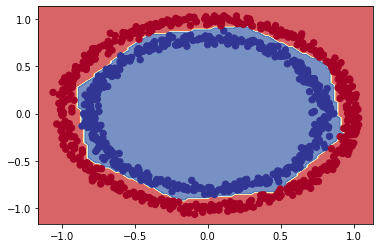

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# 2. Compile the model
model_6.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_6.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
print(model_6.evaluate(X, y))

# 5. Visualizaiton
plot_decision_boundary(model_6, X, y)



In [ ]:
# Create a toy tensor (Simialr to the dataa we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

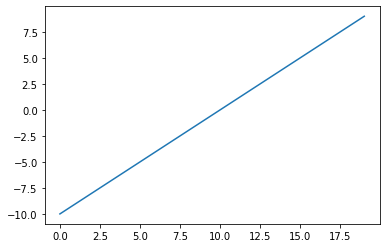

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replication sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid tensor on toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

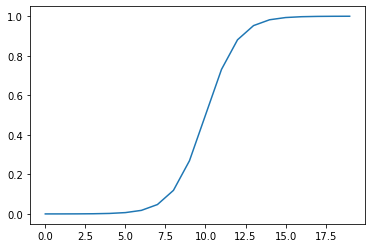

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)
# Pass our toy tensor to our custom relu function 
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

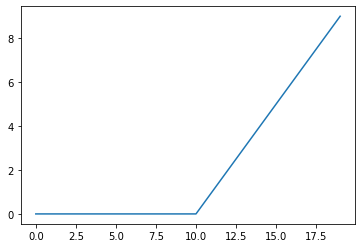

In [ ]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

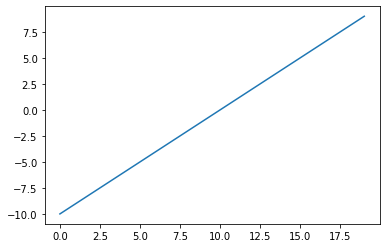

In [ ]:
# Let's try the linear activation function
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Doesn't change the input
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

In [ ]:
# Check the number of examples
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

7/7 [==============================] - 0s 3ms/step - loss: 0.1670 - accuracy: 0.9900
[0.16696900129318237, 0.9900000095367432]
313/313 [==============================] - 1s 1ms/step
Binary classification


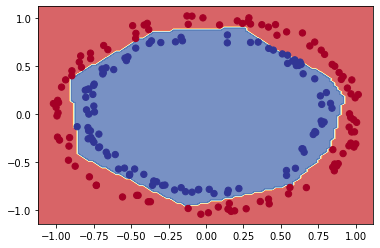

In [ ]:
# let's recreate a  model to fit on the training data and evaluate on the test data

# set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_6)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# 2. Complile the model
model_7.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01),
    metrics=["accuracy"]
)

# 3. Fit the model
history = model_7.fit(X_train, y_train, epochs=25, verbose=0)

# 4. Evaluate the model
print(model_7.evaluate(X_test, y_test))

# 5. Visualize the result
plot_decision_boundary(model_7, X_test, y_test)

In [ ]:
pd.DataFrame(history.history).head()

,loss,accuracy
0,0.689565,0.50750
1,0.684532,0.53875
2,0.679767,0.54625
3,0.673347,0.58000
4,0.665911,0.60000


<Axes: >

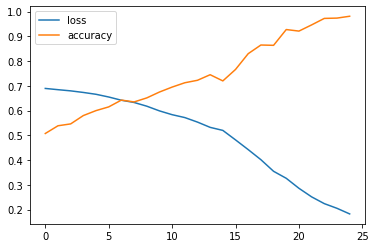

In [ ]:
pd.DataFrame(history.history).plot()

**Note:** For many problems, the loss function going down means the model is improving

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* its training
* Another model (we could use the same one as above, but we're practing building)
* A modified loss curves plot

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model 
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_8.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model 
history_8 = model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5075 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5075 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5100 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5125 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

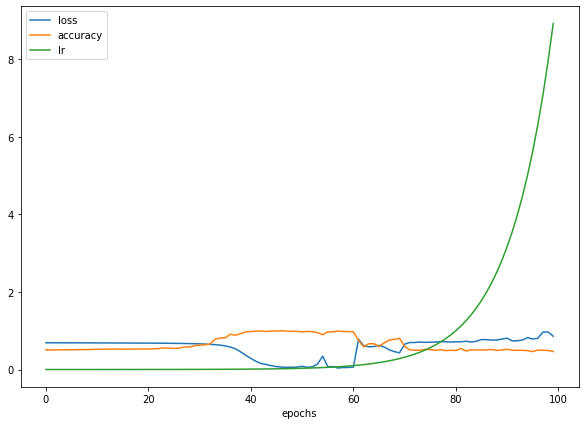

In [ ]:
pd.DataFrame(history_8.history).plot(figsize=(10,7), xlabel="epochs")

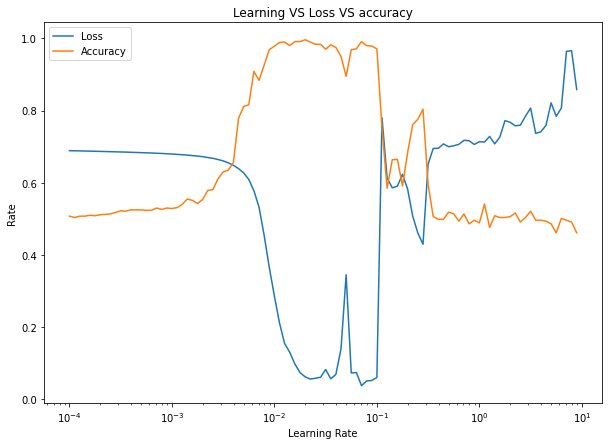

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * 10 ** (tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(
    lrs,
    history_8.history['loss'], 
    label='Loss'
)
plt.semilogx(
    lrs,
    history_8.history['accuracy'], 
    label='Accuracy'
)
plt.xlabel("Learning Rate")
plt.ylabel("Rate")
plt.title("Learning VS Loss VS accuracy")
plt.legend()


The ideal learning rate is between the lowest part of the loss curve and about 10 times smaller than that

In [ ]:
# Examples of typical learning rates
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher ideal learning rate with the same model
# Set random seed
tf.random.set_seed(42)

# Create a model 
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_9.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

# Fit the model 
history_9 = model_9.fit(X_train, y_train, epochs=20)


Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6829 - accuracy: 0.6025
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6438
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.6463
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.7400
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7800
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8800
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.9112
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.9325
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9688
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1691 - accuracy: 0.9800
Epoch 11/20
25/25 [

In [ ]:
# Evaluate the model
print(model_9.evaluate(X_test, y_test))

7/7 [==============================] - 0s 5ms/step - loss: 0.0501 - accuracy: 0.9900
[0.05010274425148964, 0.9900000095367432]


313/313 [==============================] - 1s 2ms/step
Binary classification
313/313 [==============================] - 1s 2ms/step
Binary classification


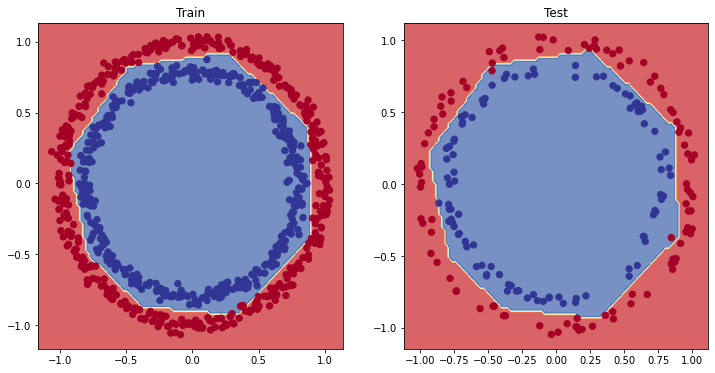

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()

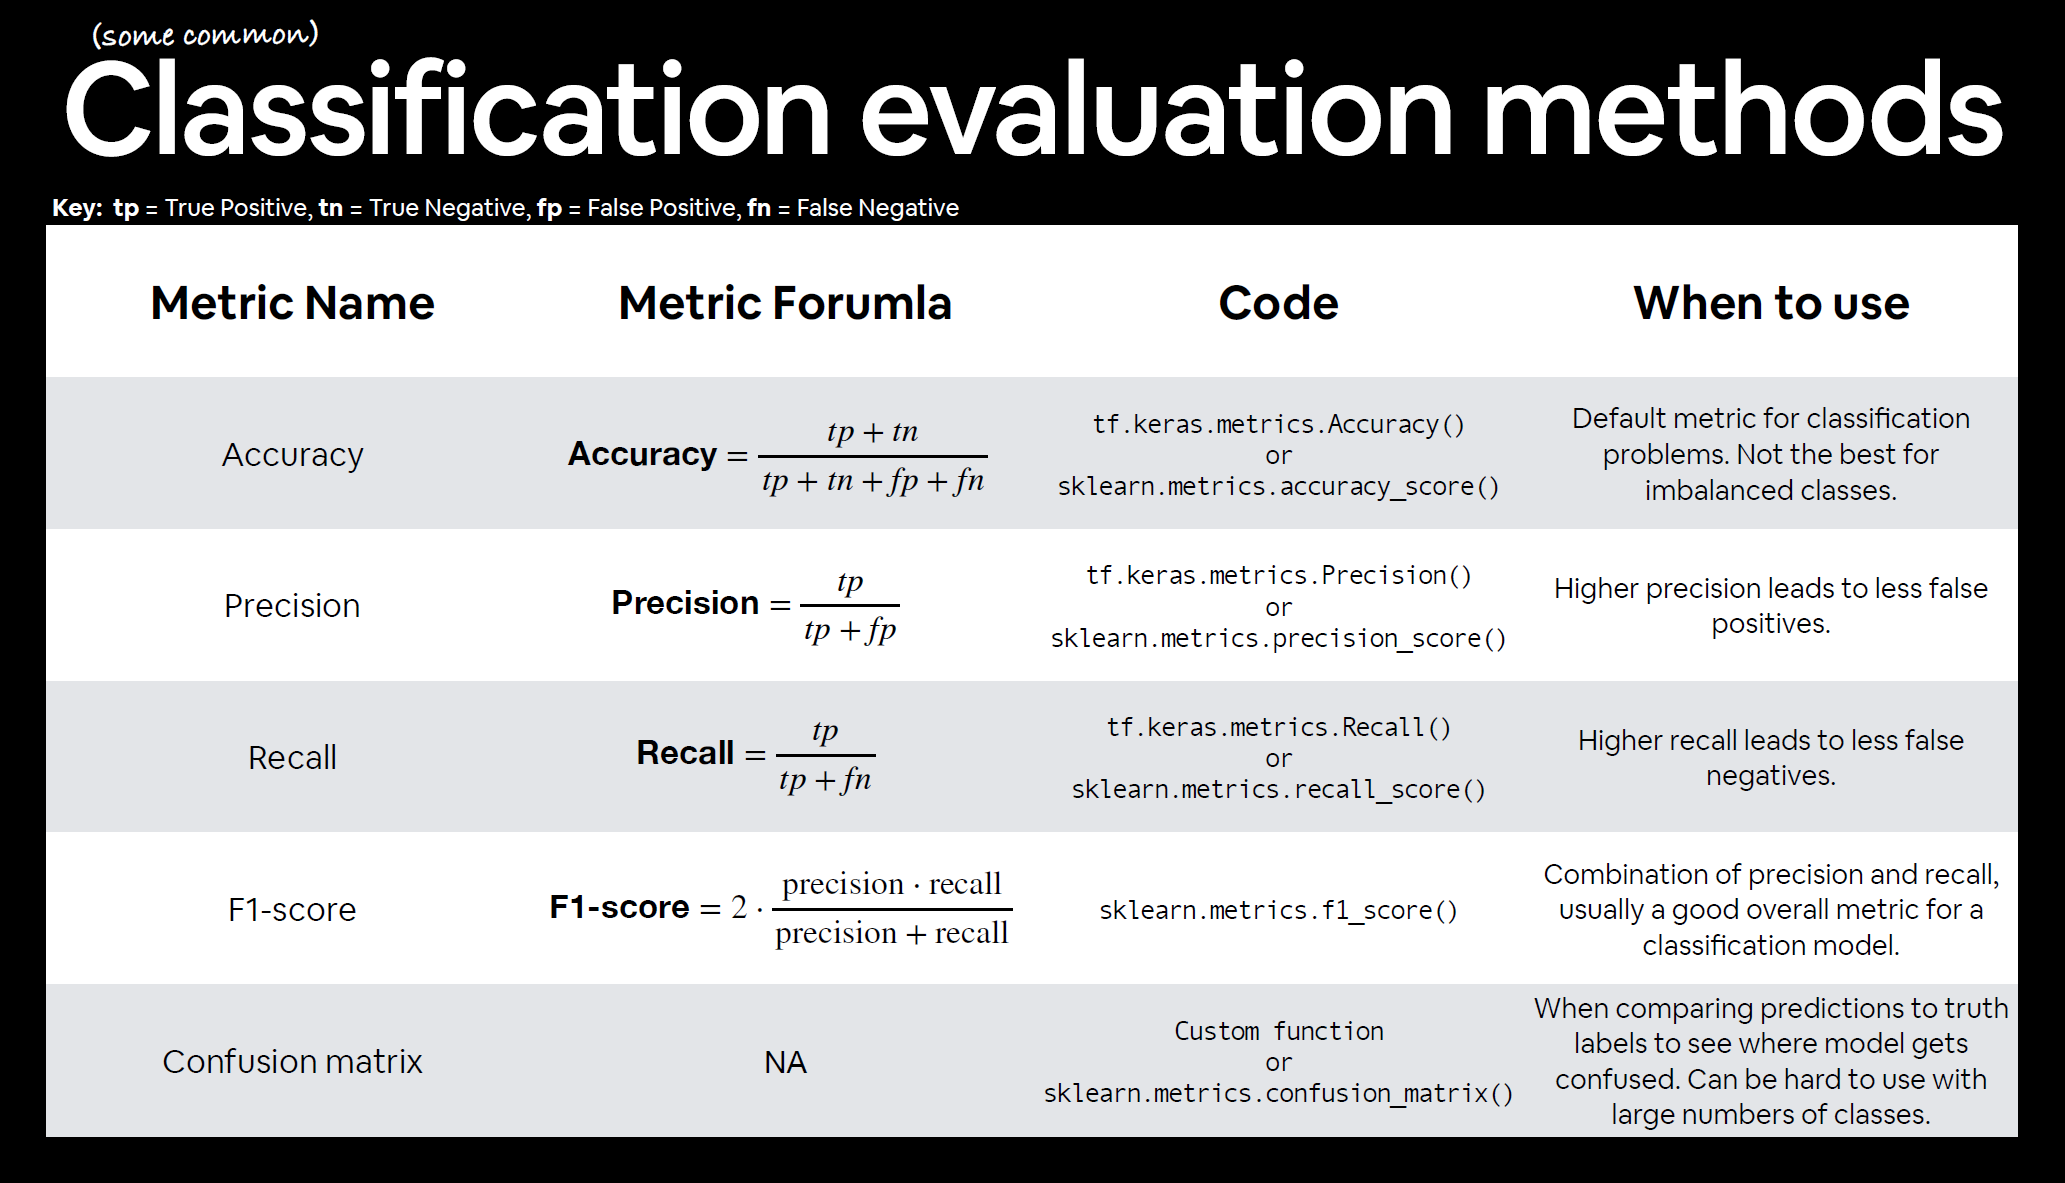

## More classification evaluation methods
Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0501 - accuracy: 0.9900
Model loss on the test set: 0.05010274425148964
Model accuracy on the test set: 99.00%


How about a confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions 
y_preds = model_9.predict(X_test)

y_test[:3], y_preds[:3], tf.round(y_preds[:3])

7/7 [==============================] - 0s 2ms/step


(array([1, 1, 1]), array([[0.96160024],
        [0.99804354],
        [0.9553398 ]], dtype=float32), <tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[1.],
        [1.],
        [1.]], dtype=float32)>)

In [ ]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

Visualizing the confusion matrix

In [75]:
from prompt_toolkit.layout.containers import HorizontalAlign
from sklearn.metrics import confusion_matrix
# Confusion matrix remix of scikit-learns function for TensorFlow
import itertools

figsize=(7,7)
def plot_confusion_matrix(true_labels, predicted_labels, classes=None, figsize=figsize, text_size=15):
  # Create teh confusion matrix
  cm = confusion_matrix(true_labels, tf.round(predicted_labels))
  # Normalizing the values to get the percentage
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  # Number of classification classes
  n_classes = cm.shape[0]
  # Visualize
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  # axis labels
  if classes: 
    labels = classes
  else:
    labels = np.arange(n_classes)
  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predcted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )
  # Set the x-axis label to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)
  # Set threshold for different text colors
  threshold = (cm.max() + cm.min()) /2
  # Plot the text on each cells
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j, 
        i, 
        f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)", 
        horizontalalignment="center", 
        color="white" if cm[i, j] > threshold else "black",
        size=text_size
        )

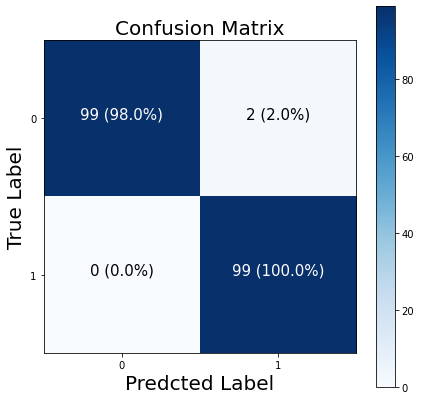

In [ ]:
plot_confusion_matrix(y_test, y_preds)

## Working with a larger example (Multiclass Classification)

When you have more than two (3 ~ infinity) clases as an option, it's known As **multiclass classification**.


To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = [
  "T-shirt/top",
  "Trouser",
  "Pullover",
  "Dress",
  "Coat",
  "Sandal",
  "Shirt",
  "Sneaker",
  "Bag",
  "Ankle boot",
]


In [4]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {class_names[train_labels[0]]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

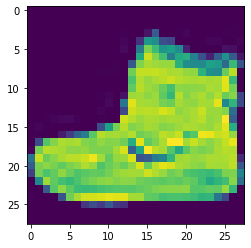

In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

Text(0.5, 1.0, 'T-shirt/top')

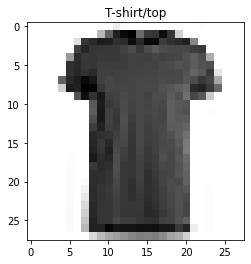

In [7]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

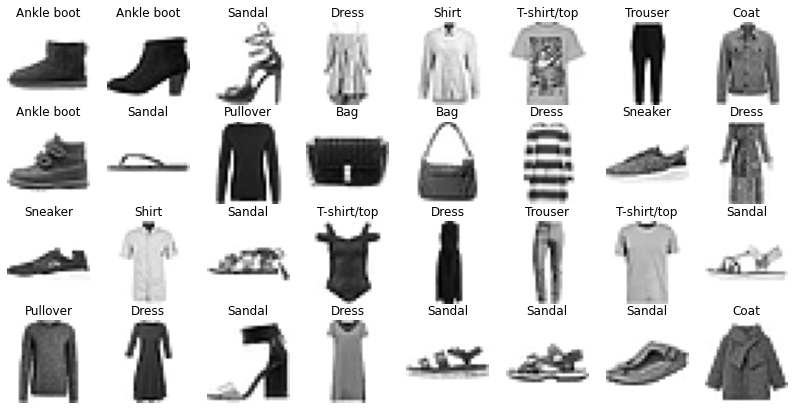

In [8]:
import random
# Plot multiple random images of fashion 
plt.figure(figsize=(14,7))
for i in range(4*8):
  ax = plt.subplot(4,8,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we use use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossEntropy()
* Output layer activation = Softmax  (not sigmoid)

In [9]:
train_data[0].shape, len(class_names)

((28, 28), 10)

In [10]:
# Our data needs to be flattend (from 28*28 to None, 784)
tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))]).output_shape, 28 * 28

((None, 784), 784)

In [11]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

**CategoricalCrossentropy:**
Computes the crossentropy loss between the labels and predictions.

Use this crossentropy loss function when there are two or more label
classes. We expect labels to be provided in a `one_hot` representation. If
you want to provide labels as integers, please use
`SparseCategoricalCrossentropy` loss.

In [12]:
tf.one_hot(test_labels, depth=10)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# 2. Compile the model
model_10.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit model
non_norm_history = model_10.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10)),
    verbose=1
)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.3465 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_ac

In [14]:
# Check the model summary
model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Evaluate the model
model_10.evaluate(test_data, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.1000


[2.3026516437530518, 0.10000000149011612]

In [16]:
# Check the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means theyl ike to have the numbers in tensors between 0 and 1

In [5]:
# We can get our training and test data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data 
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [6]:
# ONLY chaning the data to normalized comparing to model 10

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# 2. Compile the model
model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit model
norm_history = model_11.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels),
    verbose=1
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2285 - accuracy: 0.5351 - val_loss: 0.8234 - val_accuracy: 0.7002
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7384 - accuracy: 0.7202 - val_loss: 0.7221 - val_accuracy: 0.7120
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6494 - accuracy: 0.7584 - val_loss: 0.6317 - val_accuracy: 0.7773
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5949 - accuracy: 0.7914 - val_loss: 0.6080 - val_accuracy: 0.7880
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5763 - accuracy: 0.7991 - val_loss: 0.5879 - val_accuracy: 0.7933
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5631 - accuracy: 0.8027 - val_loss: 0.5976 - val_accuracy: 0.7924
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5558 - accuracy: 0.8065 - val_loss: 0.5807 - val_accuracy

In [19]:
# Evaluate the model
model_11.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 153.8014 - accuracy: 0.6078


[153.8013916015625, 0.6078000068664551]

<Axes: title={'center': 'Normalized data'}>

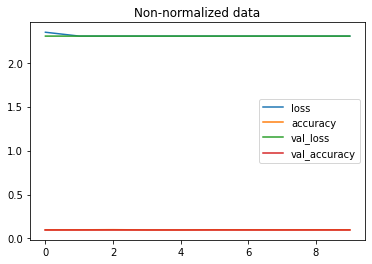

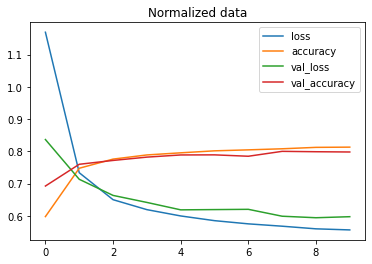

In [20]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)

## Finding the ideal learning rate

In [30]:
# Set random seed
tf.random.set_seed(42)

# Create Model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile Model
model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10 ** (epoch / 20)
    )

# Fit Model
history_12 = model_12.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    verbose=1,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]        
)

Epoch 1/40
1875/1875 [==============================] - 10s 3ms/step - loss: 1.1896 - accuracy: 0.5380 - val_loss: 0.8718 - val_accuracy: 0.6661 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7885 - accuracy: 0.6922 - val_loss: 0.7610 - val_accuracy: 0.7029 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6963 - accuracy: 0.7253 - val_loss: 0.7021 - val_accuracy: 0.7202 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6542 - accuracy: 0.7367 - val_loss: 0.6638 - val_accuracy: 0.7314 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6287 - accuracy: 0.7448 - val_loss: 0.6521 - val_accuracy: 0.7404 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6165 - accuracy: 0.7527 - val_loss: 0.6403 - val_accuracy: 0.7449 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 8

Text(0.5, 1.0, 'Learning rate decay curve')

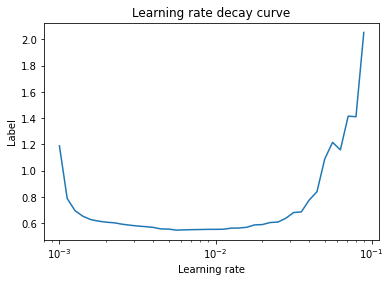

In [32]:
# Plot the learning rate decay curve
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, history_12.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Label")
plt.title("Learning rate decay curve")

Ideal learning rate: Find the lowest point of the curve, then go back a little bit (power of 10e-1)


10**-3 (0.001) is the best learning rate (Adam's default learning rate)

In [50]:
import numpy as np
np.round(lrs[np.argmin(history_12.history["loss"])] * 10**-1, 3)

0.001

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Asses some of its predictions (through visualization)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application 

In [83]:
# Let's go through the top 2

# Making predictions
y_probs = model_11.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.6285967e-10, 7.0212723e-14, 5.3891940e-09, 9.4909223e-07,
        1.3663507e-05, 3.2087561e-01, 1.4093952e-07, 1.1765075e-01,
        7.6400680e-03, 5.5381882e-01],
       [1.7106589e-03, 1.0709583e-09, 9.2432386e-01, 2.5454028e-07,
        5.0703309e-02, 8.5052981e-25, 2.3261799e-02, 1.4796664e-36,
        1.6267491e-07, 7.9657347e-17],
       [1.8531620e-03, 9.9727923e-01, 4.2281285e-09, 8.6489454e-04,
        8.5844682e-12, 1.7762503e-14, 2.7551673e-06, 8.9616125e-38,
        2.1361963e-11, 2.7224154e-26],
       [1.6264981e-03, 9.8978311e-01, 1.0645340e-09, 8.5868863e-03,
        1.0290646e-11, 2.4130824e-11, 3.3813678e-06, 3.6456766e-35,
        5.7341376e-10, 1.5969152e-24],
       [1.6259088e-01, 3.8172788e-05, 2.6815608e-01, 7.4276021e-03,
        7.8747250e-02, 6.6591941e-14, 4.8244718e-01, 1.0400180e-26,
        5.9279642e-04, 1.4761737e-12]], dtype=float32)

In [84]:
y_probs[0]

array([4.6285967e-10, 7.0212723e-14, 5.3891940e-09, 9.4909223e-07,
       1.3663507e-05, 3.2087561e-01, 1.4093952e-07, 1.1765075e-01,
       7.6400680e-03, 5.5381882e-01], dtype=float32)

In [85]:
y_preds = tf.argmax(y_probs, axis=1)
y_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])>

In [90]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[783,  13,  11,  76,   4,   0, 102,   0,  11,   0],
       [  8, 945,  12,  28,   1,   0,   5,   0,   1,   0],
       [ 33,   0, 724,   5, 136,   0,  99,   0,   3,   0],
       [ 64,  26,   6, 774,  23,   1,  91,   0,  13,   2],
       [  3,   0, 217,  14, 628,   0, 127,   0,  11,   0],
       [  0,   0,   0,   1,   2, 929,   0,  41,   6,  21],
       [192,   2, 133,  42, 111,   0, 508,   0,  12,   0],
       [  0,   0,   0,   0,   0,  43,   0, 912,   0,  45],
       [  0,   1,   2,  16,  34,  15,  47,   4, 876,   5],
       [  0,   0,   0,   1,   2,  36,   0,  56,   5, 900]])

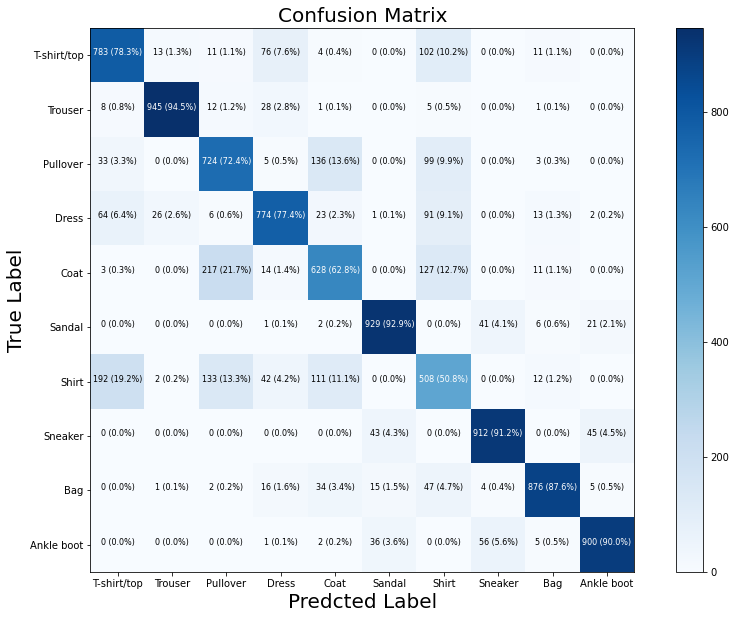

In [93]:
# Plotting the confusion matrix
plot_confusion_matrix(test_labels, y_preds, classes=class_names, text_size=8, figsize=(15,10))

Often when working with images and other forms of visual data, it's good idea to visualize as much as possible to develop a futhuer understanding of the data and the inputs and outputs of your models

Creating a function that:
* Plot a random image
* Make a prediction on said image
* Label theplot with the truth label & the predicted label

In [106]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predicitons and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color ="red"
  
  # Add xLabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})"
  .format(pred_label, 100*tf.reduce_max(pred_probs), true_label),
  color=color)

1/1 [==============================] - 0s 197ms/step


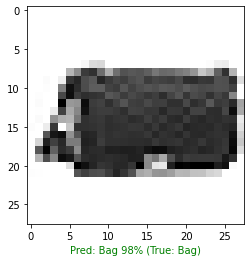

In [116]:
plot_random_image(model_11, test_data_norm, test_labels, class_names)

1/1 [==============================] - 0s 22ms/step


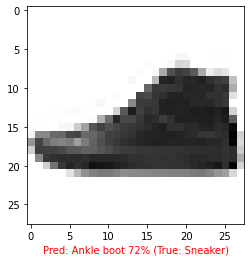

In [119]:
plot_random_image(model_11, test_data_norm, test_labels, class_names)

## What patterns is our model learning?

In [7]:
# Find the layers of our most recent model
model_11.layers

In [8]:
# Extract a particular layer
model_11.layers[1]

In [9]:
# Get the patterns of a layer in our network
weights, biases = model_11.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.330507  ,  0.37481046, -0.01975875,  0.0876971 ],
        [-0.0334098 ,  0.5008225 ,  0.09544482, -0.05910362],
        [-0.5568256 ,  0.49608734,  0.11463448,  0.5769182 ],
        ...,
        [-0.1640499 , -1.074438  ,  0.15437512, -0.03675374],
        [-0.47427395, -0.5046419 , -0.17500216, -0.39867723],
        [-0.42799136,  0.10170683, -0.19543165,  0.00706309]],
       dtype=float32), (784, 4))

In [10]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now  let's checkout the bias vector

In [11]:
# Bias and biases shape
biases, biases.shape

(array([1.5513393, 1.294641 , 2.005834 , 1.3752831], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weiths matrix.

The bias vector get initialized as zeros (at least in the case of tensorflow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

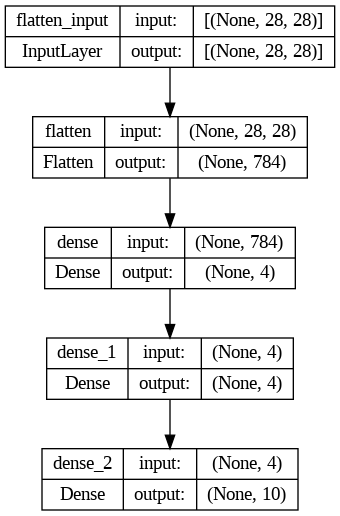

In [12]:
# Let's checkout another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_11, show_shapes=True)